In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import numpy as np
from sklearn import linear_model
from sklearn.metrics import r2_score
import numpy as np
import warnings
warnings.filterwarnings('ignore')


In [2]:
Startups=pd.read_csv("/content/50_Startups.csv")



In [3]:
Startups

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [4]:
Startups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
Startups.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

Correlation Matrix


In [6]:
Startups.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


Scatterplot between variables along with histograms


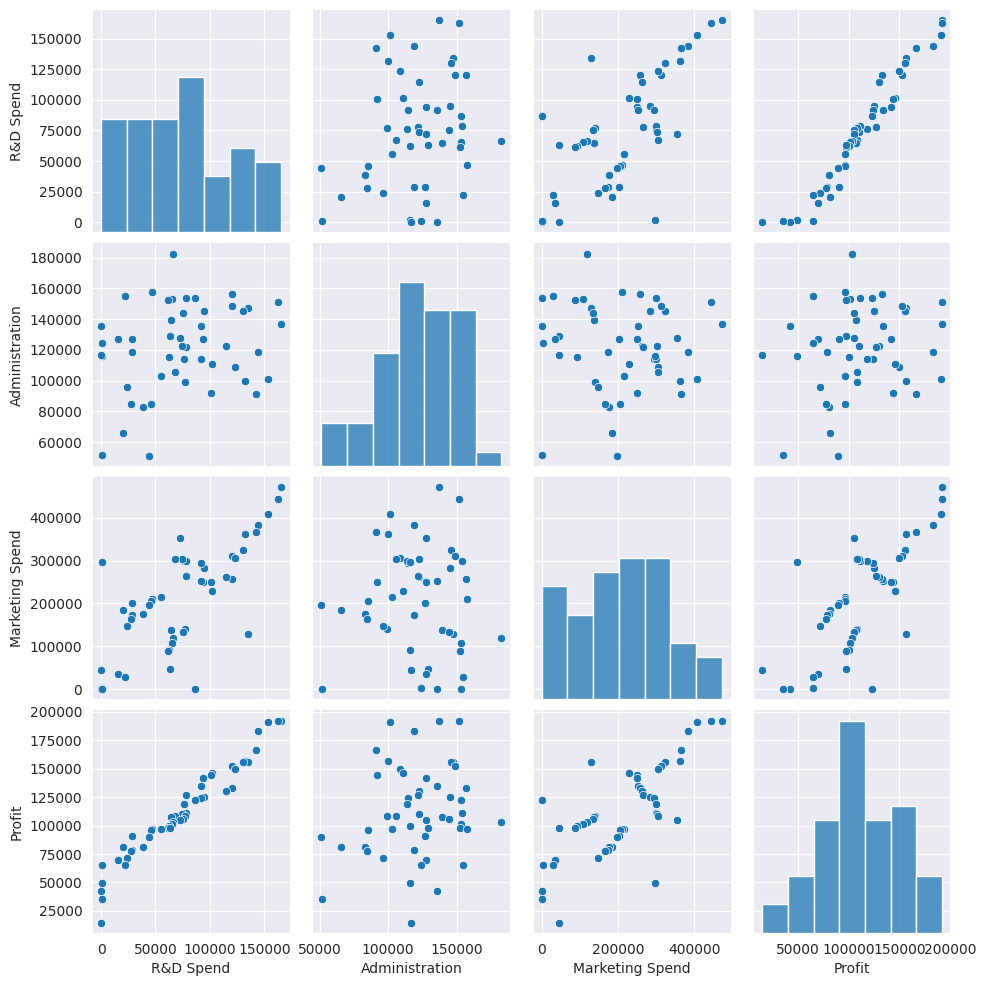

In [ ]:
sns.set_style(style='darkgrid')
sns.pairplot(Startups)

Preparing a model

preparing model


In [7]:
d1=Startups.rename({'Marketing Spend':'Marketing_Spend'},axis=1)
startups=d1.rename({'R&D Spend':'RandD_Spend'},axis=1)
startups.head(2)

,RandD_Spend,Administration,Marketing_Spend,State,Profit
0,165349.2,136897.80,471784.10,New York,192261.83
1,162597.7,151377.59,443898.53,California,191792.06


In [8]:
startup=startups.drop('State',axis=1)


In [9]:
startup

,RandD_Spend,Administration,Marketing_Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


In [10]:
startup.isnull().sum()

RandD_Spend        0
Administration     0
Marketing_Spend    0
Profit             0
dtype: int64

<Axes: >

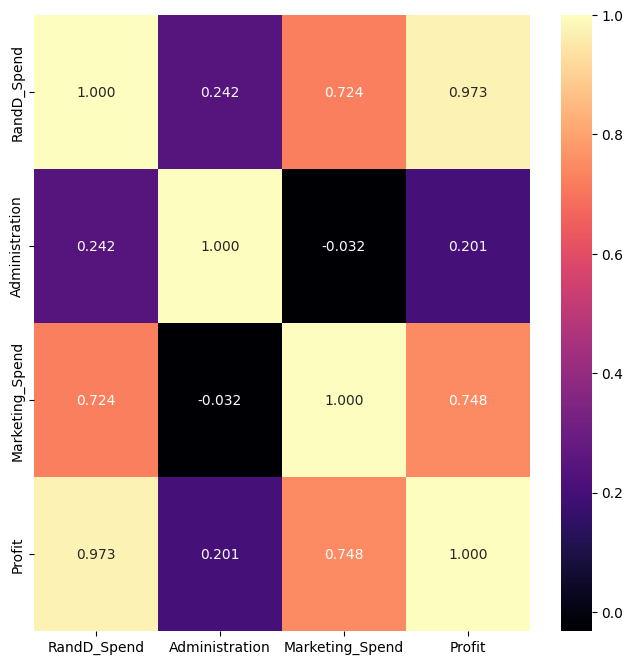

In [11]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(startup.corr(), cmap='magma', annot=True, fmt=".3f") #heatmap fmat=no.of decimals

<Axes: xlabel='Profit', ylabel='Marketing_Spend'>

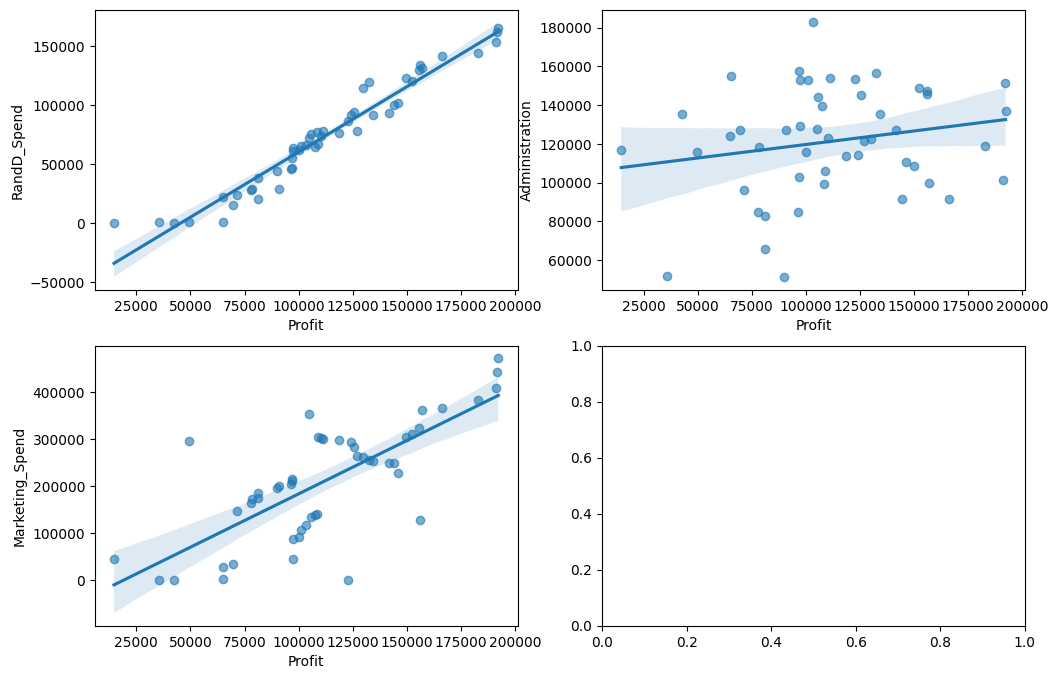

In [13]:
f, axes = plt.subplots(2, 2, figsize=(12,8))

sns.regplot(x = 'Profit', y = 'RandD_Spend', data = startup, scatter_kws={'alpha':0.6}, ax = axes[0,0])
sns.regplot(x = 'Profit', y = 'Administration', data = startup, scatter_kws={'alpha':0.6}, ax = axes[0,1])
sns.regplot(x = 'Profit', y = 'Marketing_Spend', data = startup, scatter_kws={'alpha':0.6}, ax = axes[1,0])

Model Building
Using Sklearn

In [14]:
x=startup.drop(['Profit'],axis=1).values
y=startup.iloc[:,3].values.reshape(-1,1)
x

array([[165349.2 , 136897.8 , 471784.1 ],
       [162597.7 , 151377.59, 443898.53],
       [153441.51, 101145.55, 407934.54],
       [144372.41, 118671.85, 383199.62],
       [142107.34,  91391.77, 366168.42],
       [131876.9 ,  99814.71, 362861.36],
       [134615.46, 147198.87, 127716.82],
       [130298.13, 145530.06, 323876.68],
       [120542.52, 148718.95, 311613.29],
       [123334.88, 108679.17, 304981.62],
       [101913.08, 110594.11, 229160.95],
       [100671.96,  91790.61, 249744.55],
       [ 93863.75, 127320.38, 249839.44],
       [ 91992.39, 135495.07, 252664.93],
       [119943.24, 156547.42, 256512.92],
       [114523.61, 122616.84, 261776.23],
       [ 78013.11, 121597.55, 264346.06],
       [ 94657.16, 145077.58, 282574.31],
       [ 91749.16, 114175.79, 294919.57],
       [ 86419.7 , 153514.11,      0.  ],
       [ 76253.86, 113867.3 , 298664.47],
       [ 78389.47, 153773.43, 299737.29],
       [ 73994.56, 122782.75, 303319.26],
       [ 67532.53, 105751.03, 3047

In [15]:
model=linear_model.LinearRegression()
model.fit(x,y)

LinearRegression()

In [16]:
model.rank_

3

In [17]:
model.coef_

array([[ 0.80571505, -0.02681597,  0.02722806]])

In [18]:
model.intercept_

array([50122.19298987])

In [19]:
r2_score(y,model.predict(x))

0.9507459940683246

Using stats.ols

In [22]:
Module=smf.ols("Profit~Administration+Marketing_Spend+RandD_Spend",data=startups).fit()
Module.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Wed, 24 Jan 2024   Prob (F-statistic):           4.53e-30
Time:                        08:53:26   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
Administration     -0.0268      0.051     -0.526      0.602      -0.130       0.076
Marketing_Spend     0.0272      0.016      1.655      0.105      -0.006       0.060
RandD_Spend         0.8057      0.045     17.846      0.000       0.715       0.897
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Test for Normality of Residuals (Q-Q Plot)


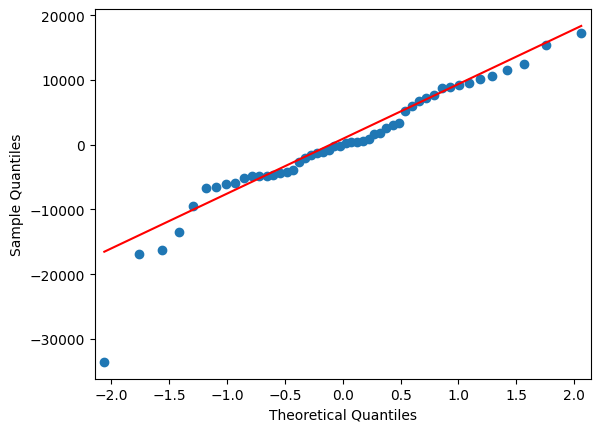

In [24]:
import statsmodels.api as sm
qqplot=sm.qqplot(Module.resid,line='q')

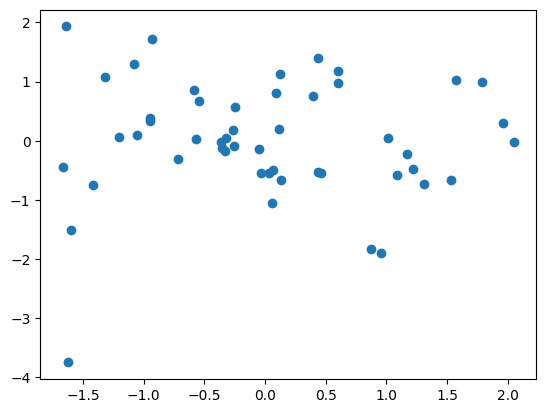

In [26]:
def std( vals ):                      #Loop created for return values.
    return (vals - vals.mean())/vals.std()

plt.scatter(std(Module.fittedvalues),
            std(Module.resid))

Residual Vs Regressors


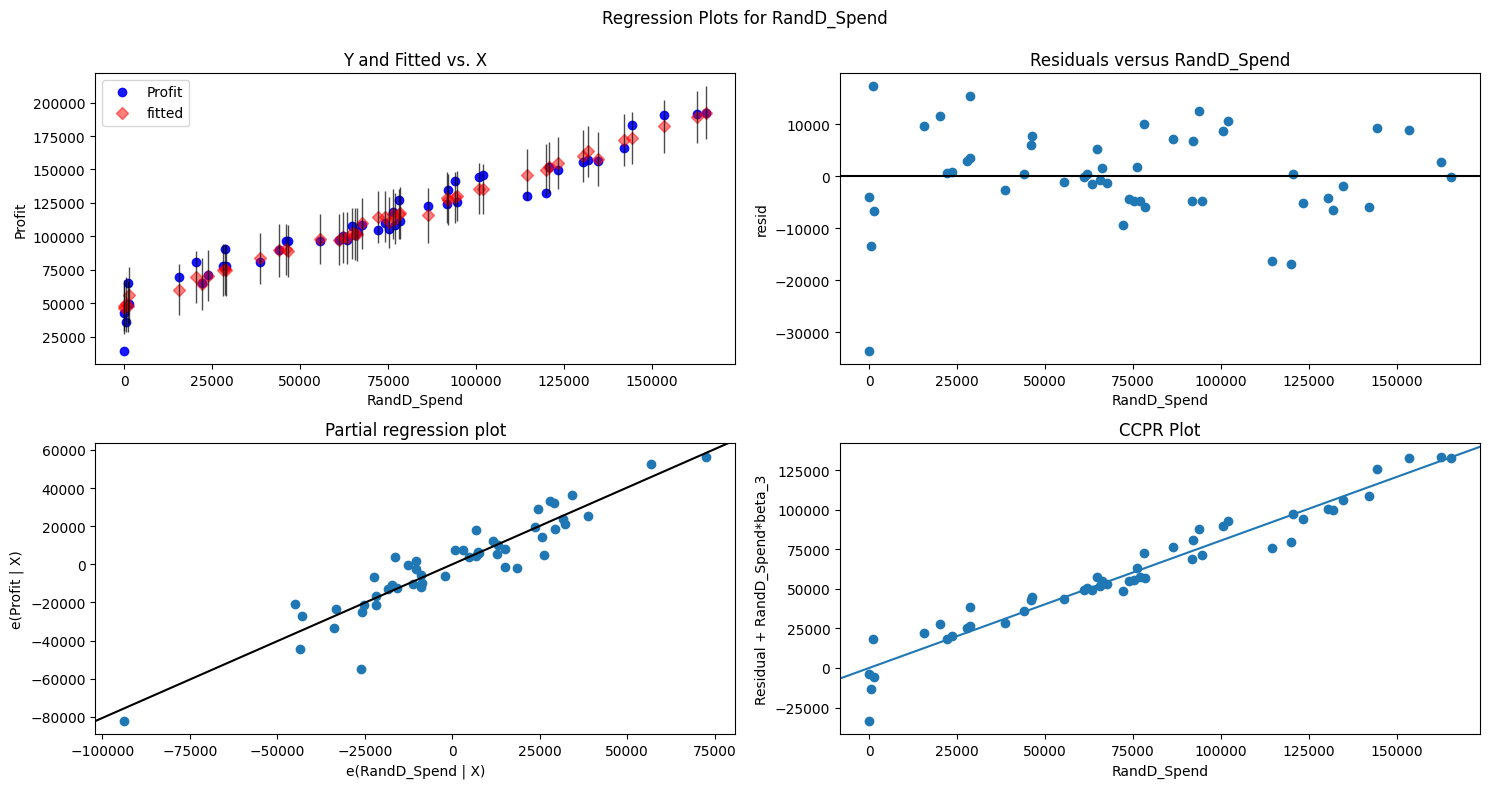

In [27]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(Module, "RandD_Spend", fig=fig)
plt.show()

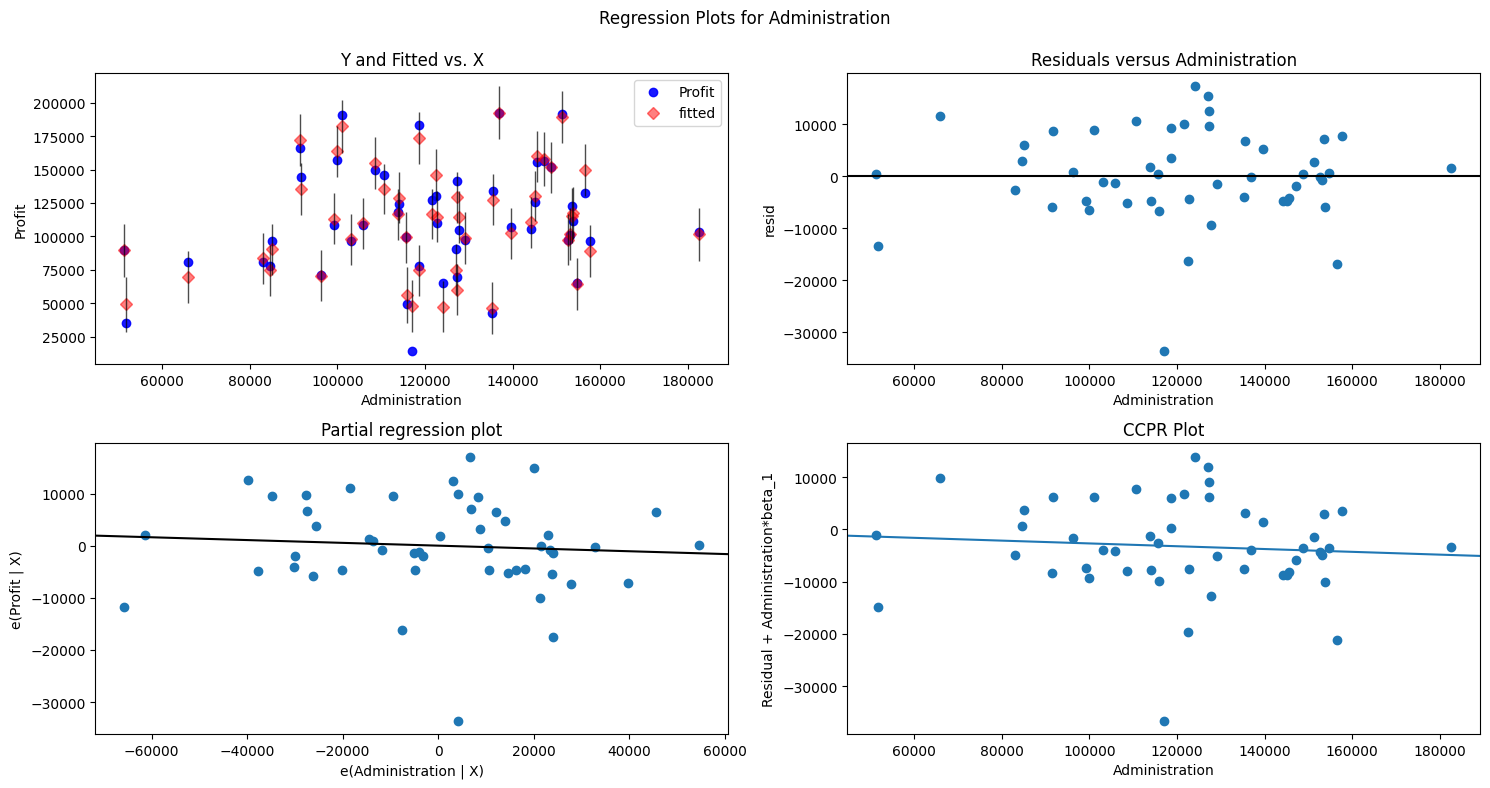

In [33]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(Module,"Administration",fig=fig)
plt.show()

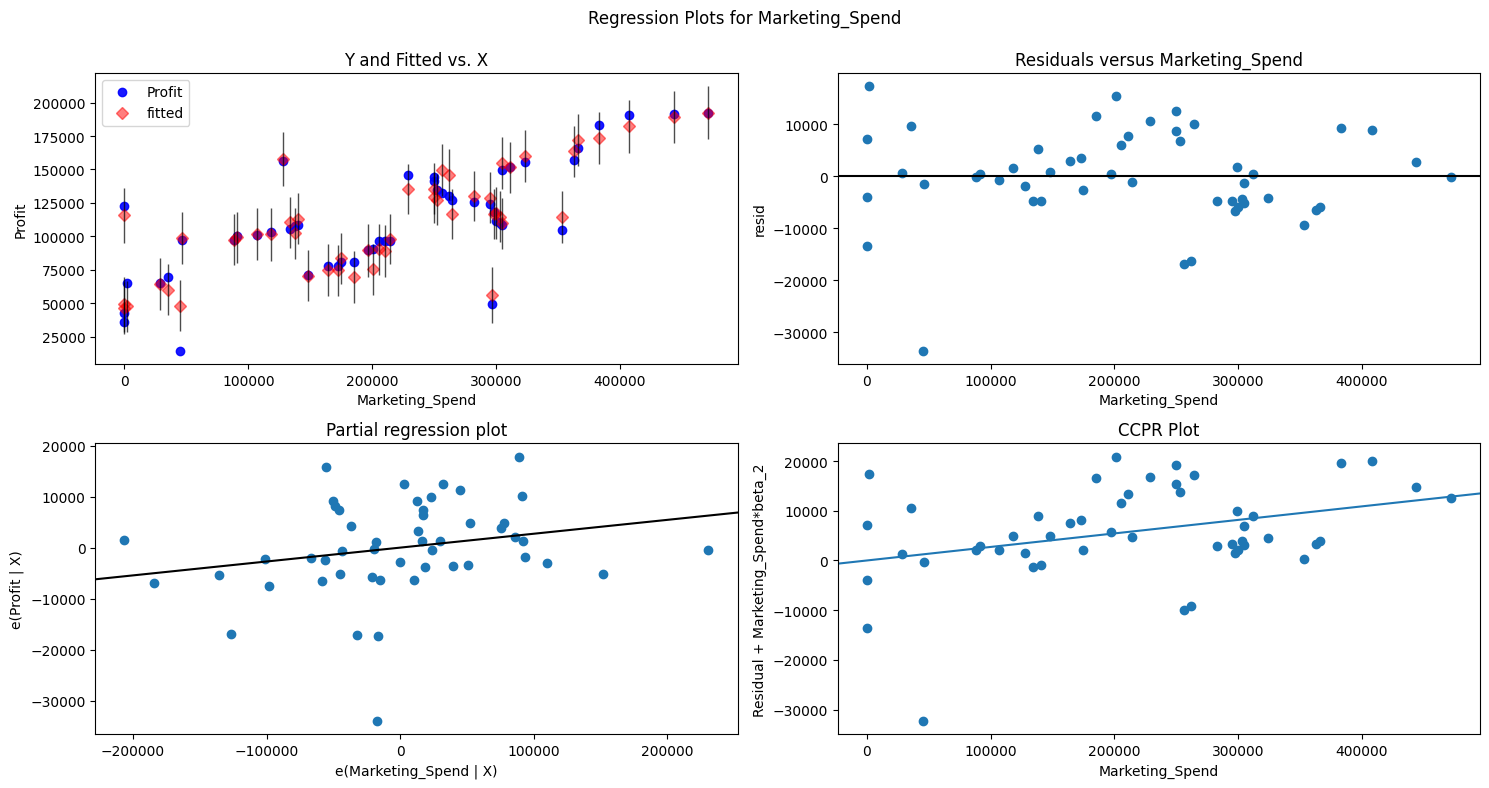

In [37]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(Module,"Marketing_Spend",fig=fig)
plt.show()

Model Deletion Diagnostics
Detecting Influencers/Outliers


In [39]:
Module_influence=Module.get_influence()
(c,_)=Module_influence.cooks_distance


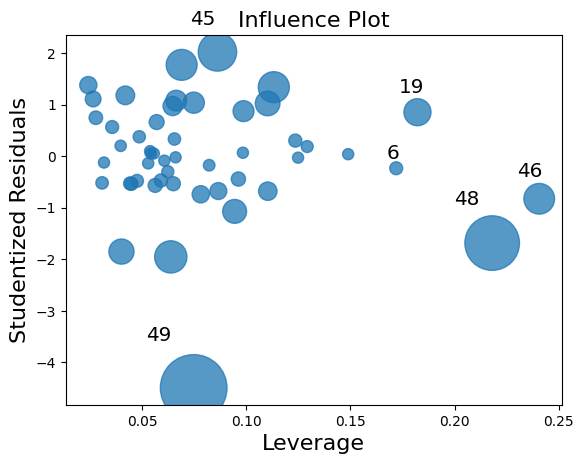

In [43]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(Module)
plt.show()

In [44]:
(np.argmax(c),np.max(c)) #index and value of influencer where >.5

(49, 0.28808229275432723)

since value is lessthan 1 we no need to do the diagnostic process and finalize the model

In [45]:
(Module .rsquared,Module.aic)

(0.9507459940683246, 1058.7714985998052)

In [46]:
Module.params

Intercept          50122.192990
Administration        -0.026816
Marketing_Spend        0.027228
RandD_Spend            0.805715
dtype: float64

Inference:Y=50122.2+0.805715x1-0.026816x2+0.027228x3 is best suited model.